<a href="https://colab.research.google.com/github/lucabarattini/Titanic-Dataset-AppliedML-Project/blob/main/Luca_Barattini_LB3656_Applied_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COMSW4995 - Applied Machine Learning
### Luca Barattini - @lb3656:

# Importing our libraries:


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, make_scorer

In [ ]:
df = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()
print('*'*50)
print(df.isnull().sum())
print('*'*50)
print((df.isna().mean() * 100).round(2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
**************************************************
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cab

### Given that there are 70% of NaN values in the cabin column we can go ahead and drop the column. Whereas, for Age we will proceed with imputation. Last but not least, for the two rows with missing values on embarked we will proceed as well with imputation.

In [ ]:
#Starting with imputing for the 'Embarked' Column based on the mode of the Pclass column that is clearly indicative of the embarked feature.
print(df.groupby('Pclass')['Embarked'].value_counts())

print('*'*150)

display(df[df['Embarked'].isna()])

df['Embarked'] = df['Embarked'].fillna(df.groupby('Pclass')['Embarked'].transform(lambda s: s.mode().iat[0]))

print('*'*150)

display(df.loc[[61, 829]])


Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: count, dtype: int64
******************************************************************************************************************************************************


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


******************************************************************************************************************************************************


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64
******************************************************************************************************************************************************
Cabin % NaN: 77.10%
Non-null: 204 |  Unique: 147
******************************************************************************************************************************************************


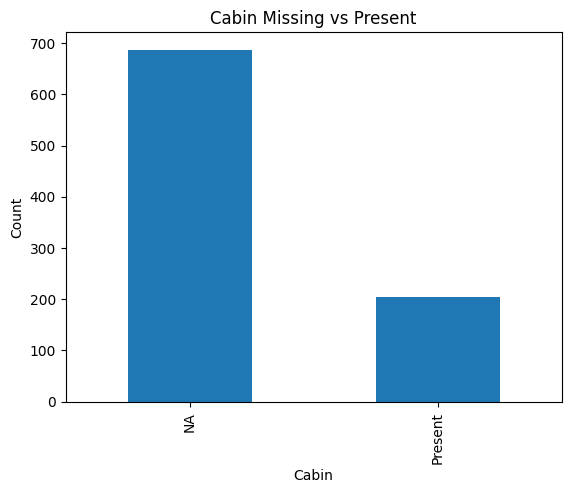

******************************************************************************************************************************************************
Shape after drop: (891, 11)
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.00
dtype: float64


In [ ]:
print(df['Cabin'].value_counts())

print('*'*150)

print(f"Cabin % NaN: {df['Cabin'].isna().mean()*100:.2f}%")
print(f"Non-null: {df['Cabin'].notna().sum()} |  Unique: {df['Cabin'].nunique()}")

print('*'*150)

df['Cabin'].isna().value_counts().rename({True:'NA', False:'Present'}).plot(kind='bar')
plt.title('Cabin Missing vs Present'); plt.ylabel('Count'); plt.show()

print('*'*150)
df = df.drop(columns=['Cabin'])
print('Shape after drop:', df.shape)
print((df.isna().mean() * 100).round(2))

In [ ]:
a_b_testing = df.copy()

# Creating a new column named title:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')[0]
# Creating the 'Missing Age' feature, before doing imputation on the 'Age' column
df['Age_missing'] = a_b_testing['Age'].isna().astype(int)

# Displaying them:
display(df)
print('*'*150)

df['Age'] = df['Age'] \
    .fillna(df.groupby(['Title','Pclass'])['Age'].transform('median')) \
    .fillna(df['Age'].median())

print('Sanity Check after dropping:')
print(df.isnull().sum())
print('*'*150)
print('Median age by passenger class and sex:')
print(df.groupby(['Pclass','Sex'])['Age'].median())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,0


******************************************************************************************************************************************************
Sanity Check after dropping:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Age_missing    0
dtype: int64
******************************************************************************************************************************************************
Median age by passenger class and sex:
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      31.0
3       female    18.0
        male      26.0
Name: Age, dtype: float64


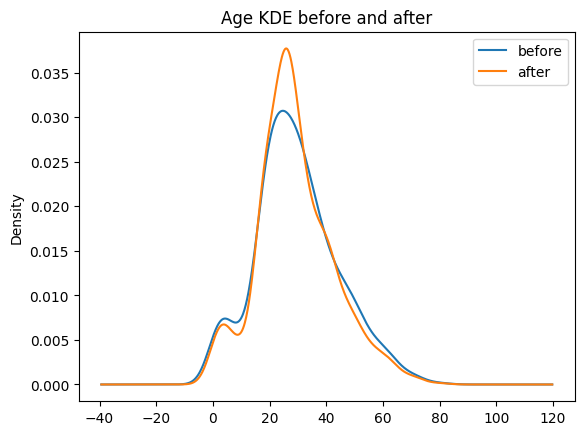

In [ ]:
fig, ax = plt.subplots()
a_b_testing['Age'].dropna().clip(0, 80).plot(kind='kde', ax=ax)
df['Age'].clip(0, 80).plot(kind='kde', ax=ax)
ax.legend(['before','after']); ax.set_title('Age KDE before and after')
plt.show()

### Now that we have removed the Cabin feature and imputed the 'Age' column using the median grouped by Title and PassengerClass we can move over.
### What we will be carrying out next is creating some sanity checks to handle some noisy and incosistent values.

### We will start by checking the categorical variable in our dataset:

In [ ]:
# First, let's check that the intuition behind the categorical var is correct.
print('monotonic:', df.PassengerId.is_monotonic_increasing)
print('*'*150)
has_duplicates = df['PassengerId'].duplicated().any()
print(f"Are there duplicate PassengerIds? {'Yes' if has_duplicates else 'No'}")
print('*'*150)
weird_tickets = df['Ticket'].str.len().lt(3) | df['Ticket'].str.contains(r'[^A-Za-z0-9 /.-]')
print(f"Are there suspicious Ticket numbers? {'Yes' if weird_tickets.any() else 'No'}")

monotonic: True
******************************************************************************************************************************************************
Are there duplicate PassengerIds? No
******************************************************************************************************************************************************
Are there suspicious Ticket numbers? No


In [ ]:
print('Unique values by column:')
print('Survived →', df['Survived'].unique())
print('Pclass   →', df['Pclass'].unique())
print('Sex      →', df['Sex'].unique())
print('Embarked →', df['Embarked'].unique())
print('Title    →', df['Title'].unique())

print('*'*150)

Unique values by column:
Survived → [0 1]
Pclass   → [3 1 2]
Sex      → ['male' 'female']
Embarked → ['S' 'C' 'Q']
Title    → ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
******************************************************************************************************************************************************


### Given that there aren't incosistent values across my categorical variables I can move over to the numerical ones.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_missing
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.146655,0.523008,0.381594,32.204208,0.198653
std,257.353842,0.486592,0.836071,13.499426,1.102743,0.806057,49.693429,0.399210
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,36.750000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


******************************************************************************************************************************************************


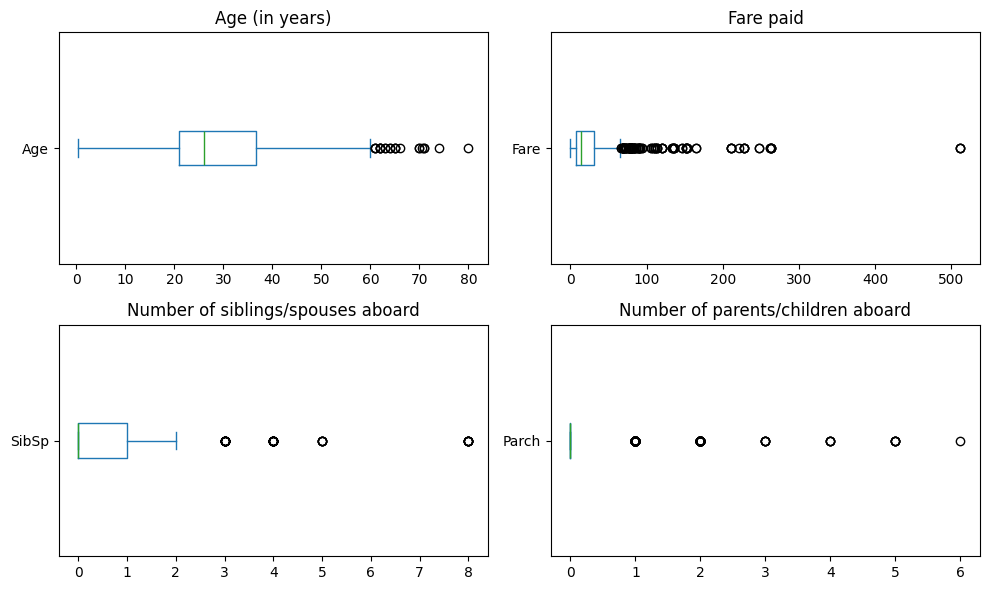

In [ ]:
display(df.describe())
print('*'*150)

num = ['Age', 'Fare', 'SibSp', 'Parch']
titles = {
    'Age': 'Age (in years)',
    'Fare': 'Fare paid',
    'SibSp': 'Number of siblings/spouses aboard',
    'Parch': 'Number of parents/children aboard'
}

fig, axes = plt.subplots(nrows=2, ncols= 2, figsize=(10, 6))

for ax, col in zip(axes.flat, num):
    df[col].plot(kind='box', vert=False, ax=ax)
    ax.set_title(titles[col])

plt.tight_layout()
plt.show()

### The boxplots make it easy to identify outliers. Based on those, our dataset doesn't seem to have some clear outlier per each of the numeric features.

### You clearly have some values that are remarkably larger than others but this is normal considering variables like age (where you can be older) or number siblings// childrens aboard.

### What we need to investigate further is if we have some clearly missinserted values with comparison to our 'Fare' variable. In other terms, as we observe some extreme values in this feature we need to analyse whether those high prices corrispond with an higher class (i.e. 500 in Fare-> Would correspond to 1st class).

In [ ]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
threshold = q3 + 3 * iqr
print(f"Fare IQR: {iqr:.2f}")
print(f"Threshold (3×IQR): {threshold:.2f}")
print('*'*150)
extreme_fares = df[df['Fare'] >= threshold]
print(f"Extreme fare rows: {len(extreme_fares)}")
print()
print(extreme_fares['Pclass'].value_counts())

Fare IQR: 23.09
Threshold (3×IQR): 100.27
******************************************************************************************************************************************************
Extreme fare rows: 53

Pclass
1    53
Name: count, dtype: int64


### Already from the last ``` print(extreme_fares['Pclass'].value_counts())``` we could clearly see that all the 3*IQR values were having a first class ticket but for better visualization I also created a stacked bar chart.



/tmp/ipython-input-4233075373.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


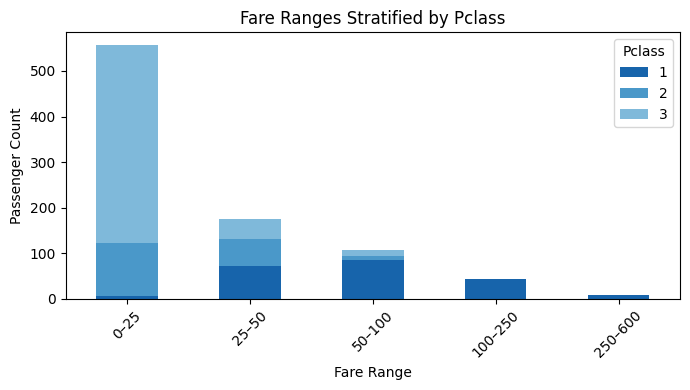

In [ ]:
fare_labels = ['0–25', '25–50', '50–100', '100–250', '250–600']
fare_bin = pd.cut(df['Fare'], bins=[0,25,50,100,250,600], labels=fare_labels, include_lowest=True)

cmap = cm.get_cmap('Blues')
cols3 = [cmap(0.8), cmap(0.6), cmap(0.45)]  # Pclass 1,2,3 as dark→light blues

pd.crosstab(fare_bin, df['Pclass']).plot(kind='bar', stacked=True, color=cols3, figsize=(7,4))
plt.title('Fare Ranges Stratified by Pclass')
plt.xlabel('Fare Range'); plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()


### Before doing Feature Engineering we want to move forward with a more in-depth exploratory data analysis:

Colormap definition

In [ ]:
cmap = cm.get_cmap('Blues')
b_dark, b_mid, b_light = cmap(0.85), cmap(0.65), cmap(0.45)

def ensure_cols(frame, candidates):
    """Return only columns that exist in frame, preserving order."""
    return [c for c in candidates if c in frame.columns]

/tmp/ipython-input-1649536500.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


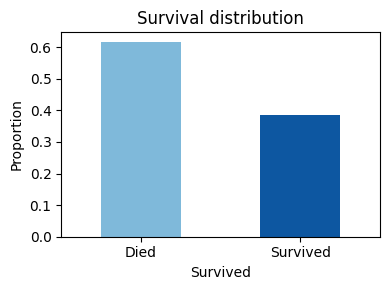

In [ ]:
# ---- Target imbalance ----
fig, ax = plt.subplots(figsize=(4,3))
(df['Survived'].value_counts(normalize=True)
   .rename({0:'Died',1:'Survived'})
   .reindex(['Died','Survived'])
   .plot(kind='bar', color=[b_light, b_dark], rot=0, ax=ax))
ax.set_ylabel('Proportion'); ax.set_title('Survival distribution'); plt.tight_layout(); plt.show()

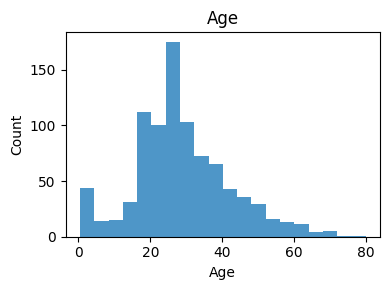

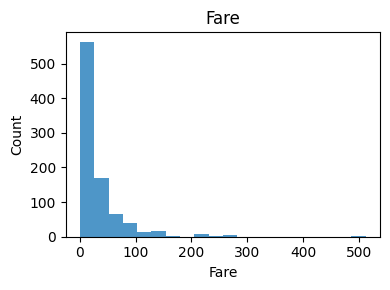

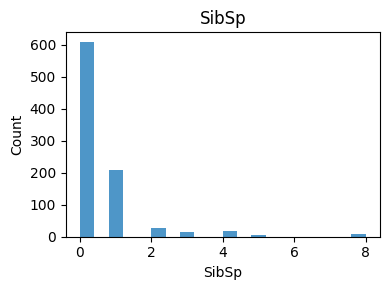

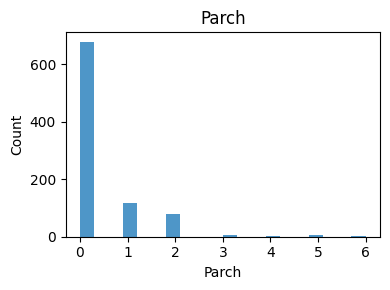

In [ ]:
# ---- Numeric: histograms (Age, Fare, SibSp, Parch, FamilySize if present) ----
num_cols = ensure_cols(df, ['Age','Fare','SibSp','Parch','FamilySize'])
for col in num_cols:
    fig, ax = plt.subplots(figsize=(4,3))
    df[col].plot(kind='hist', bins=20, color=b_mid, alpha=0.9, ax=ax)
    ax.set_title(col); ax.set_ylabel('Count'); ax.set_xlabel(col)
    plt.tight_layout(); plt.show()

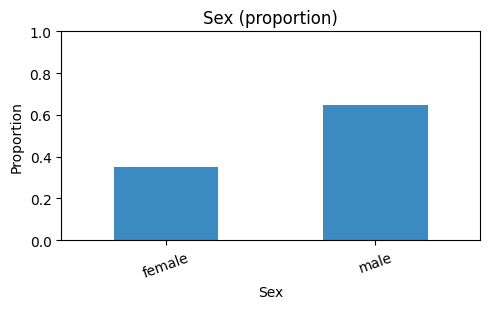

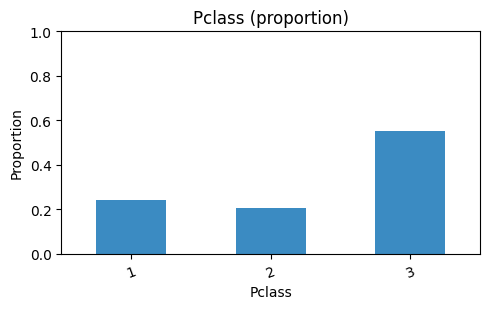

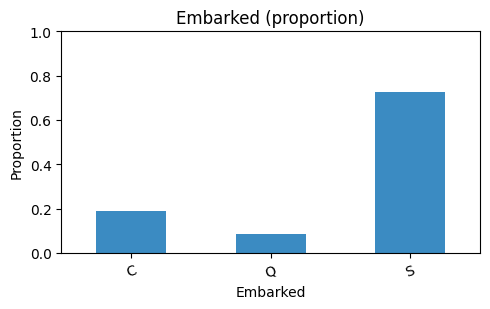

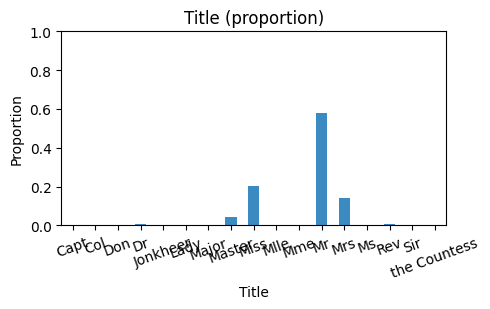

In [ ]:
# ---- Categorical: normalized bars (Sex, Pclass, Embarked if present) ----
cat_cols = ensure_cols(df, ['Sex','Pclass','Embarked'])
for col in cat_cols:
    fig, ax = plt.subplots(figsize=(5,3.2))
    (df[col].value_counts(normalize=True)
        .sort_index()
        .plot(kind='bar', color=b_mid, ax=ax))
    ax.set_title(f'{col} (proportion)'); ax.set_ylabel('Proportion')
    ax.set_ylim(0, 1); ax.tick_params(axis='x', rotation=20)
    plt.tight_layout(); plt.show()


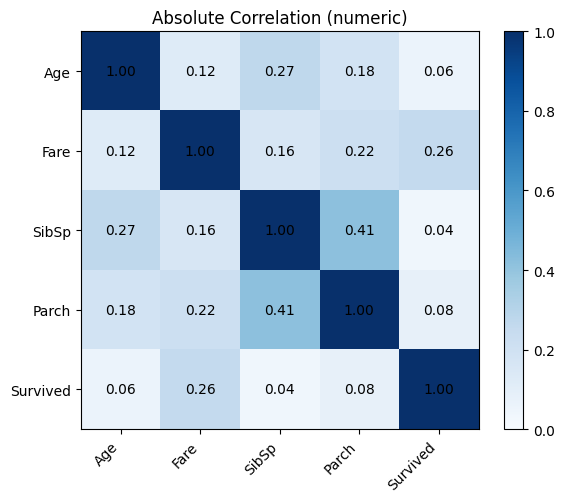

In [ ]:
# ---- Absolute correlation heatmap (numeric only) ----
num_cols = ensure_cols(df, ['Age','Fare','SibSp','Parch','FamilySize'])
corr = df[num_cols + ['Survived']].corr().abs()
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(corr, cmap='Blues', vmin=0, vmax=1)
ax.set_xticks(range(len(corr.columns))); ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticks(range(len(corr.index)));   ax.set_yticklabels(corr.index)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f'{corr.values[i,j]:.2f}', ha='center', va='center', color='black')
ax.set_title('Absolute Correlation (numeric)'); fig.colorbar(im, ax=ax); plt.tight_layout(); plt.show()


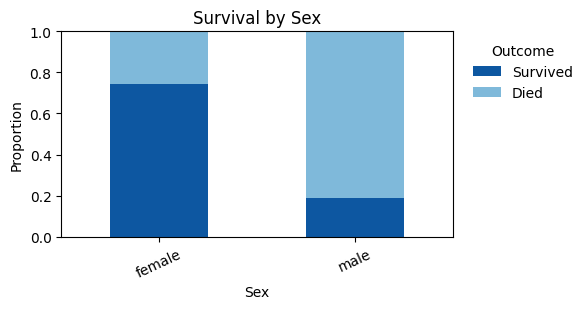

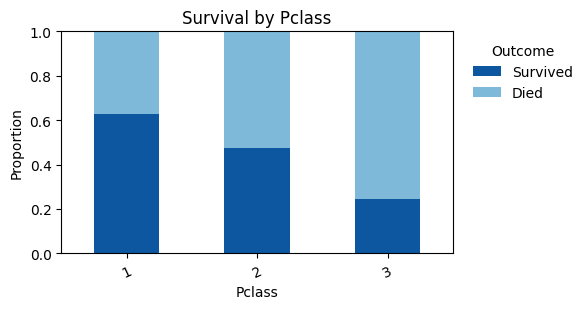

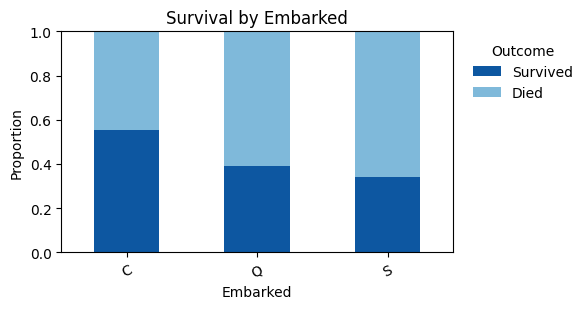

In [ ]:
# ---- Survival rate by each categorical (stacked) ----
cats = ensure_cols(df, ['Sex','Pclass','Embarked','IsAlone','IsChild','Mother','AgeBin'])
for col in cats:
    tab = pd.crosstab(df[col], df['Survived'], normalize='index').reindex(columns=[1,0])
    fig, ax = plt.subplots(figsize=(6,3.2))
    tab.plot(kind='bar', stacked=True, color=[b_dark, b_light], ax=ax, legend=True)
    ax.set_title(f'Survival by {col}'); ax.set_ylabel('Proportion'); ax.set_ylim(0,1)
    ax.tick_params(axis='x', rotation=25)
    leg = ax.legend(['Survived','Died'],
                loc='upper left', bbox_to_anchor=(1.02, 1.0),
                frameon=False, title='Outcome')
    plt.tight_layout(); plt.show()


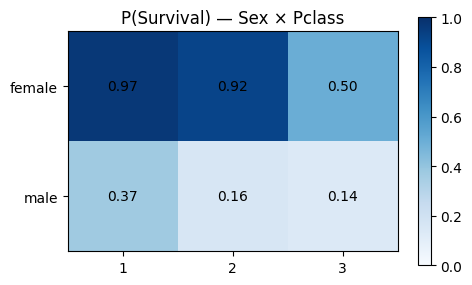

In [ ]:
# ---- Heatmap: mean survival by Sex × Pclass ----
if {'Sex','Pclass','Survived'}.issubset(df.columns):
    piv = df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')
    fig, ax = plt.subplots(figsize=(5,3))
    im = ax.imshow(piv.values, cmap='Blues', vmin=0, vmax=1)
    ax.set_xticks(range(len(piv.columns))); ax.set_xticklabels(piv.columns)
    ax.set_yticks(range(len(piv.index)));   ax.set_yticklabels(piv.index)
    for i in range(piv.shape[0]):
        for j in range(piv.shape[1]):
            ax.text(j, i, f'{piv.values[i,j]:.2f}', ha='center', va='center')
    ax.set_title('P(Survival) — Sex × Pclass')
    fig.colorbar(im, ax=ax); plt.tight_layout(); plt.show()

### Now it's time to move forward with the feature engineering part.
### Firstly, we want to create features that work well with all the ML models that we'll fit. Then, we can create some more ad-hoc features.
### We will start with 9 features, respectively:
*   FamilySize
*   FarePerPerson
*   Fare_rel_Pclass
*   IsAlone
*   IsChild
*   Mother
*   Title (re-worked)
*   TicketGroupSize
*   TicketShared



In [ ]:
initial = df.copy()
#####################
labels = ['Age_0_5', 'Age_5_12', 'Age_12_16', 'Age_16_25', 'Age_25_40', 'Age_40_60', 'Age_60_80']
#####################
# Creating the first features:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FarePerPerson'] = (df['Fare']/df['FamilySize']).round(1)
df['Fare_rel_Pclass'] = df['FarePerPerson'] / df.groupby('Pclass')['FarePerPerson'].transform('median')
df['IsAlone'] = (df['FamilySize']==1).astype(int)
df['IsChild'] = (df['Age']<16).astype(int)
df['Mother'] = ((df['Sex']=='female') & (df['Age']>=18) & (df['Parch']>0) & (df['Title']!='Miss')).astype(int)
df['Title'] = df['Title'].replace({
    'Mlle':'Miss','Ms':'Miss','Mme':'Mrs','Lady':'Royalty','Countess':'Royalty',
    'Sir':'Royalty','Don':'Royalty','Jonkheer':'Royalty','Dona':'Royalty', 'the Countess':'Royalty',
    'Capt':'Officer','Col':'Officer','Major':'Officer','Dr':'Officer','Rev':'Officer'
})
df['TicketGroupSize'] = df.groupby('Ticket')['Ticket'].transform('count')
df['TicketShared'] = (df['TicketGroupSize']>1).astype(int)
#####################
# Binning Age:
edges = [-np.inf,5,12,16,25,40,60,np.inf]
df['AgeBin'] = pd.cut(df['Age'], bins=edges, right=False, labels=labels)
d = pd.get_dummies(df['AgeBin'], dtype=int)
df = pd.concat([df, d], axis=1)
#####################
# OHE of our Embarked and Title feature.
df = df.join(pd.get_dummies(df['Embarked'], prefix='Emb', dtype=int))
df = df.join(pd.get_dummies(df['Title'], prefix='Title', dtype=int))

#####################
# Inspecting how sex and ticketclass influences survival chances:
display(pd.crosstab([df.Sex, df.Pclass], df.Survived, normalize='index').round(3))

# Now that from the table above we have seen there's correlation between survival chances and Pclass
# we'll need to create a feature to better understand it's effect. This feature will be called SC_XY,
# where X will indicate the sex, and Y will be indicating the passengerclass.

df['SexClass'] = df['Sex'].str[0].str.upper() + df['Pclass'].astype(str)
df = pd.concat([df, pd.get_dummies(df['SexClass'], prefix='SC', dtype=int)], axis=1)

Survived           0      1
Sex    Pclass              
female 1       0.032  0.968
       2       0.079  0.921
       3       0.500  0.500
male   1       0.631  0.369
       2       0.843  0.157
       3       0.865  0.135

/tmp/ipython-input-4113073622.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


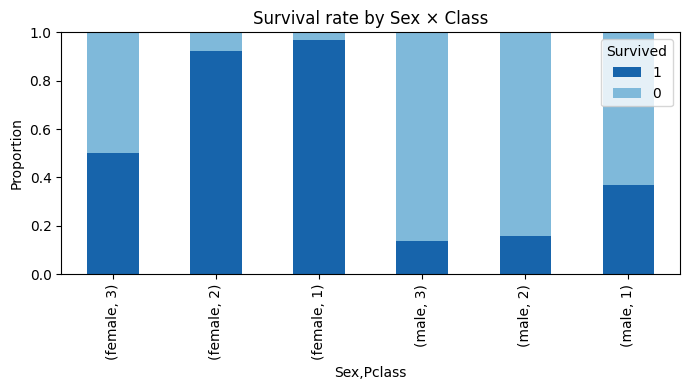

In [ ]:
tab = pd.crosstab([df['Sex'], df['Pclass']], df['Survived'], normalize='index').reindex(columns=[1,0])
tab = tab.sort_index(level=['Sex','Pclass'], ascending=[True, False])

cmap = cm.get_cmap('Blues')
cols2 = [cmap(0.8), cmap(0.45)]  # Survived=dark, Died=light (columns are [1,0])

tab.plot(kind='bar', stacked=True, color=cols2, figsize=(7,4))
plt.title('Survival rate by Sex × Class')
plt.ylabel('Proportion'); plt.ylim(0,1)
plt.tight_layout(); plt.show()

### Applying Transformations (Scaling):

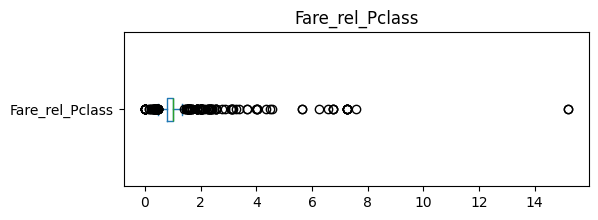

In [ ]:
plt.figure(figsize=(6,2))
df['Fare_rel_Pclass'].plot(kind='box', vert=False)
plt.title('Fare_rel_Pclass')
plt.show()

In [ ]:
df['Fare_rel_Pclass'] = np.log(df['Fare_rel_Pclass'].clip(lower=1e-6))
mu = df['Fare_rel_Pclass'].mean()
sd = df['Fare_rel_Pclass'].std(ddof=0)
df['Fare_rel_Pclass'] = (df['Fare_rel_Pclass'] - mu) / sd

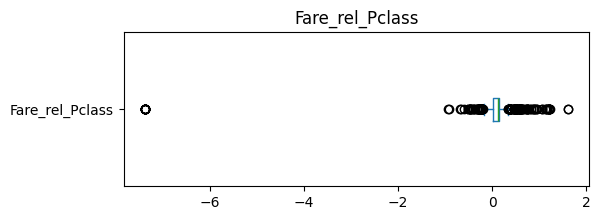

In [ ]:
plt.figure(figsize=(6,2))
df['Fare_rel_Pclass'].plot(kind='box', vert=False)
plt.title('Fare_rel_Pclass')
plt.show()

### Polishing the dataframes for our BernoulliNB and GaussianNB Naive Bayes Classifier

In [ ]:
#####################
df_bernoulli = df.copy()
df_gaussian = df.copy()
#####################
# Binning Fare relative ton the PClass into four quantiles based bins:
df_bernoulli['FareRel_Pclass_bin'] = pd.qcut(df_bernoulli['Fare_rel_Pclass'], q=4, labels=False)
df_bernoulli = df_bernoulli.join(pd.get_dummies(df_bernoulli['FareRel_Pclass_bin'], prefix='FareRel_PClass', dtype=int))
df_bernoulli['FS_1']   = (df_bernoulli['FamilySize']==1).astype(int)
df_bernoulli['FS_2_3'] = df_bernoulli['FamilySize'].between(2,3).astype(int)
df_bernoulli['FS_4p']  = (df_bernoulli['FamilySize']>=4).astype(int)

# Dropping some redundant features to avoid multicolinearity and dummy-variables effect.
df_bernoulli = df_bernoulli.drop(columns=['SexClass', 'Sex', 'Pclass', 'Embarked', 'Age','AgeBin', 'Fare', 'FarePerPerson', 'TicketGroupSize', 'IsAlone', 'Title', 'PassengerId','Name','Ticket', 'SibSp', 'Parch', 'Fare_rel_Pclass', 'FareRel_Pclass_bin', 'FamilySize'])

# Dropping some redundant features to avoid multicolinearity and dummy-variables effect.
age_cols = [c for c in df_gaussian.columns if c.startswith('Age_') and c != 'Age_missing']
df_gaussian = df_gaussian.drop(columns=age_cols)
df_gaussian = df_gaussian.drop(columns=['SexClass', 'Sex', 'Pclass', 'Embarked', 'AgeBin', 'Fare', 'FarePerPerson', 'TicketGroupSize', 'IsAlone', 'Title', 'PassengerId','Name','Ticket', 'SibSp', 'Parch'])

df_linear = df_gaussian.copy()
df_linear = df_linear.drop(columns=['Emb_S', 'SC_F1', 'Title_Master'])

In [ ]:
print(f'Initial Shape of our dataframe: {initial.shape}')
print(f'Final Shape of our dataframe (Bernoulli): {df_bernoulli.shape}')
print(f'Final Shape of our dataframe (Gaussian): {df_gaussian.shape}')

Initial Shape of our dataframe: (891, 13)
Final Shape of our dataframe (Bernoulli): (891, 34)
Final Shape of our dataframe (Gaussian): (891, 23)


### Train/Test split for all our models:

In [ ]:
idx = np.arange(len(df))
itr, ite = train_test_split(idx, test_size=0.30, stratify=df['Survived'].values, random_state=42)

In [ ]:
# Bernoulli view
y_b = df_bernoulli['Survived'].values
X_b = df_bernoulli.drop(columns=['Survived'])
Xb_tr, Xb_te, yb_tr, yb_te = X_b.iloc[itr], X_b.iloc[ite], y_b[itr], y_b[ite]

# Gaussian view
y_g = df_gaussian['Survived'].values
X_g = df_gaussian.drop(columns=['Survived'])
Xg_tr, Xg_te, yg_tr, yg_te = X_g.iloc[itr], X_g.iloc[ite], y_g[itr], y_g[ite]

# Linear family view (Ridge/Lasso/OLS)
y_l = df_linear['Survived'].values
X_l = df_linear.drop(columns=['Survived'])
Xl_tr, Xl_te, yl_tr, yl_te = X_l.iloc[itr], X_l.iloc[ite], y_l[itr], y_l[ite]

### Cration of our eval dataframe:

In [ ]:
preds = pd.DataFrame(index=df.index[ite])
rows = []
model_order = []

### BernoulliNB (α comparison) + confusion matrix + ROC:

BernoulliNB α=0.1  acc=0.780  prec=0.693  rec=0.767  f1=0.728  auc=0.833
BernoulliNB α=0.5  acc=0.780  prec=0.693  rec=0.767  f1=0.728  auc=0.832


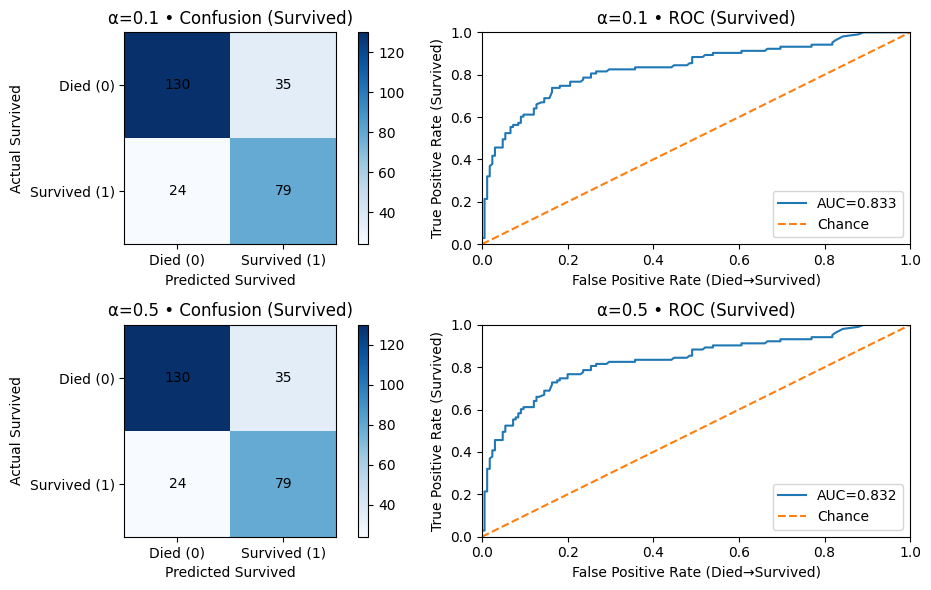

In [ ]:
alphas = [0.1, 0.5]
fig, axes = plt.subplots(nrows=len(alphas), ncols=2, figsize=(10, 6))

for i, a in enumerate(alphas):
    nb = BernoulliNB(alpha=a).fit(Xb_tr, yb_tr)
    pr = nb.predict_proba(Xb_te)[:,1]
    yp = (pr>=0.5).astype(int)

    # --- storing my results ---
    name = f'BernoulliNB α={a}'
    preds[name+'_proba'] = pd.Series(pr, index=Xb_te.index).reindex(preds.index)
    preds[name+'_pred']  = pd.Series(yp, index=Xb_te.index).reindex(preds.index)
    rows.append({'Model':name, 'Accuracy':accuracy_score(yb_te,yp),
                 'Precision':precision_score(yb_te,yp), 'Recall':recall_score(yb_te,yp),
                 'F1':f1_score(yb_te,yp), 'AUC':roc_auc_score(yb_te,pr)})
    model_order.append(name)
    # --------------------------

    print(f'BernoulliNB α={a}  acc={accuracy_score(yb_te,yp):.3f}  prec={precision_score(yb_te,yp):.3f}  rec={recall_score(yb_te,yp):.3f}  f1={f1_score(yb_te,yp):.3f}  auc={roc_auc_score(yb_te,pr):.3f}')
    cm = confusion_matrix(yb_te, yp)
    ax = axes[i,0]; im = ax.imshow(cm, cmap='Blues')
    for r in range(2):
        for c in range(2):
            ax.text(c, r, cm[r, c], ha='center', va='center')
    ax.set_xticks([0,1]); ax.set_xticklabels(['Died (0)','Survived (1)'])
    ax.set_yticks([0,1]); ax.set_yticklabels(['Died (0)','Survived (1)'])
    ax.set_xlabel('Predicted Survived'); ax.set_ylabel('Actual Survived'); ax.set_title(f'α={a} • Confusion (Survived)')
    fig.colorbar(im, ax=ax)

    fpr, tpr, _ = roc_curve(yb_te, pr)
    ax2 = axes[i,1]
    ax2.plot(fpr, tpr, label=f'AUC={auc(fpr,tpr):.3f}')
    ax2.plot([0,1],[0,1],'--', label='Chance')
    ax2.set_xlim(0,1); ax2.set_ylim(0,1)
    ax2.set_xlabel('False Positive Rate (Died→Survived)'); ax2.set_ylabel('True Positive Rate (Survived)')
    ax2.set_title(f'α={a} • ROC (Survived)')
    ax2.legend(loc='lower right')

plt.tight_layout(); plt.show()


### GaussianNB + confusion matrix + ROC:

GaussianNB  acc=0.799  prec=0.729  rec=0.757  f1=0.743  auc=0.866


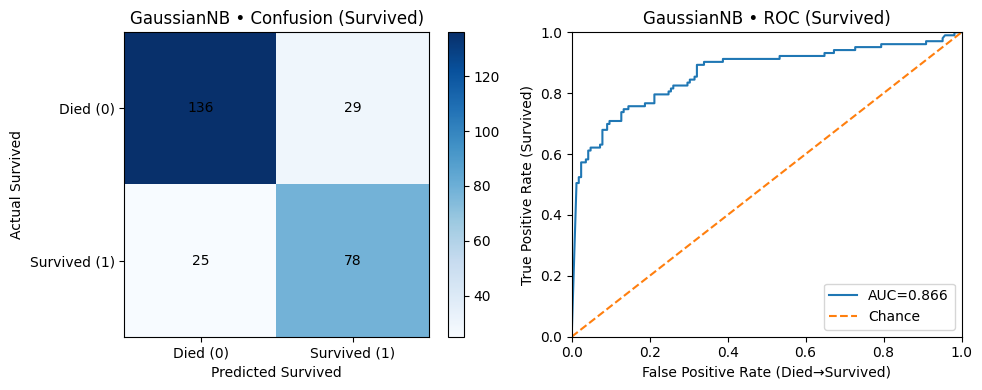

In [ ]:
gnb = GaussianNB().fit(Xg_tr, yg_tr)
pr = gnb.predict_proba(Xg_te)[:,1]
yp = (pr>=0.5).astype(int)
name = 'GaussianNB'
# --- storing my results ---
preds[name+'_proba'] = pd.Series(pr, index=Xg_te.index).reindex(preds.index)
preds[name+'_pred']  = pd.Series(yp, index=Xg_te.index).reindex(preds.index)
rows.append({'Model':name, 'Accuracy':accuracy_score(yg_te,yp),
             'Precision':precision_score(yg_te,yp), 'Recall':recall_score(yg_te,yp),
             'F1':f1_score(yg_te,yp), 'AUC':roc_auc_score(yg_te,pr)})
model_order.append(name)
# --------------------------
print(f'GaussianNB  acc={accuracy_score(yg_te,yp):.3f}  prec={precision_score(yg_te,yp):.3f}  rec={recall_score(yg_te,yp):.3f}  f1={f1_score(yg_te,yp):.3f}  auc={roc_auc_score(yg_te,pr):.3f}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

cm = confusion_matrix(yg_te, yp)
ax = axes[0]
im = ax.imshow(cm, cmap='Blues')
for r in range(2):
    for c in range(2):
        ax.text(c, r, cm[r, c], ha='center', va='center')
ax.set_xticks([0,1]); ax.set_xticklabels(['Died (0)','Survived (1)'])
ax.set_yticks([0,1]); ax.set_yticklabels(['Died (0)','Survived (1)'])
ax.set_xlabel('Predicted Survived'); ax.set_ylabel('Actual Survived'); ax.set_title('GaussianNB • Confusion (Survived)')
fig.colorbar(im, ax=ax)

fpr, tpr, _ = roc_curve(yg_te, pr)
ax2 = axes[1]
ax2.plot(fpr, tpr, label=f'AUC={auc(fpr,tpr):.3f}')
ax2.plot([0,1],[0,1],'--', label='Chance')
ax2.set_xlim(0,1); ax2.set_ylim(0,1)
ax2.set_xlabel('False Positive Rate (Died→Survived)'); ax2.set_ylabel('True Positive Rate (Survived)')
ax2.set_title('GaussianNB • ROC (Survived)')
ax2.legend(loc='lower right')

plt.tight_layout(); plt.show()

### Smoothing vs. not Smoothing:

### BernoulliNB

In [ ]:
alphas = [0.0, 1e-6, 0.1, 0.5]
out = []
for a in alphas:
    m = BernoulliNB(alpha=a).fit(Xb_tr, yb_tr)
    p = m.predict_proba(Xb_te)[:,1]
    y = (p>=0.5).astype(int)
    out.append([a, accuracy_score(yb_te,y), precision_score(yb_te,y), recall_score(yb_te,y),
                f1_score(yb_te,y), roc_auc_score(yb_te,p)])
res_b = pd.DataFrame(out, columns=['alpha','Accuracy','Precision','Recall','F1','AUC'])
display(res_b)

,alpha,Accuracy,Precision,Recall,F1,AUC
0,0.000000,0.779851,0.692982,0.76699,0.728111,0.832568
1,0.000001,0.779851,0.692982,0.76699,0.728111,0.832568
2,0.100000,0.779851,0.692982,0.76699,0.728111,0.832510
3,0.500000,0.779851,0.692982,0.76699,0.728111,0.832215


In [ ]:
alphas = [0.0, 1e-6, 0.1, 0.5]
rare = Xb_tr.mean().nsmallest(6).index
tbl = pd.DataFrame({a: np.exp(BernoulliNB(alpha=a).fit(Xb_tr,yb_tr).feature_log_prob_[1])
                    for a in alphas}, index=X_b.columns).loc[rare].T
display(tbl)

,Title_Royalty,Age_12_16,Title_Officer,Age_60_80,Age_5_12,Title_Master
0.000000,0.008368,0.025105,0.020921,0.012552,0.033473,0.062762
0.000001,0.008368,0.025105,0.020921,0.012552,0.033473,0.062762
0.100000,0.008779,0.025502,0.021321,0.012960,0.033863,0.063127
0.500000,0.010417,0.027083,0.022917,0.014583,0.035417,0.064583


In [ ]:
vs = [1e-12, 1e-9, 1e-6]
res_g = []
for v in vs:
    gnb = GaussianNB(var_smoothing=v).fit(Xg_tr, yg_tr)
    pr = gnb.predict_proba(Xg_te)[:,1]
    yp = (pr>=0.5).astype(int)
    res_g.append([v,
                  accuracy_score(yg_te,yp),
                  precision_score(yg_te,yp),
                  recall_score(yg_te,yp),
                  f1_score(yg_te,yp),
                  roc_auc_score(yg_te,pr)])
pd.DataFrame(res_g, columns=['var_smoothing','Accuracy','Precision','Recall','F1','AUC'])

,var_smoothing,Accuracy,Precision,Recall,F1,AUC
0,1.000000e-12,0.798507,0.728972,0.757282,0.742857,0.866167
1,1.000000e-09,0.798507,0.728972,0.757282,0.742857,0.866167
2,1.000000e-06,0.798507,0.728972,0.757282,0.742857,0.865813


### Gaussian:

In [ ]:
vs = [1e-12, 1e-9, 1e-6]
out = []
for v in vs:
    m = GaussianNB(var_smoothing=v).fit(Xg_tr, yg_tr)
    p = m.predict_proba(Xg_te)[:,1]
    y = (p>=0.5).astype(int)
    out.append([v, accuracy_score(yg_te,y), precision_score(yg_te,y), recall_score(yg_te,y),
                f1_score(yg_te,y), roc_auc_score(yg_te,p)])
res_g = pd.DataFrame(out, columns=['var_smoothing','Accuracy','Precision','Recall','F1','AUC'])
display(res_g)


,var_smoothing,Accuracy,Precision,Recall,F1,AUC
0,1.000000e-12,0.798507,0.728972,0.757282,0.742857,0.866167
1,1.000000e-09,0.798507,0.728972,0.757282,0.742857,0.866167
2,1.000000e-06,0.798507,0.728972,0.757282,0.742857,0.865813


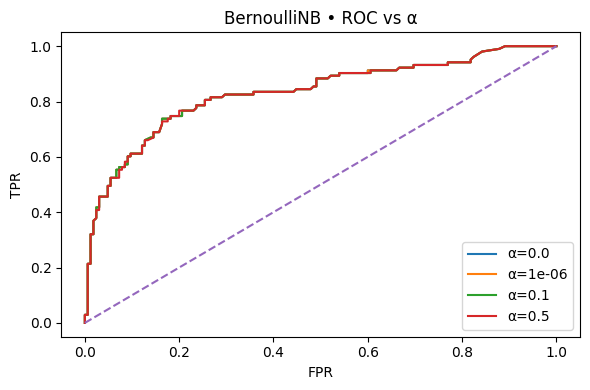

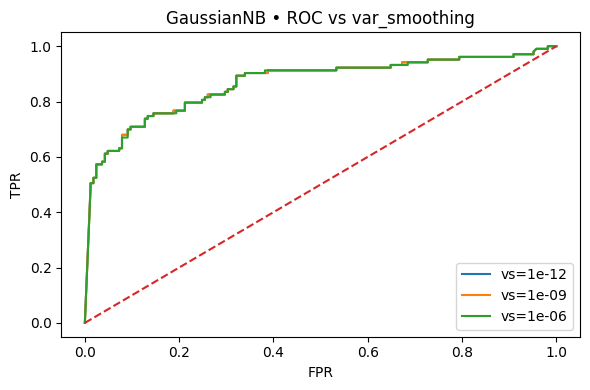

In [ ]:
plt.figure(figsize=(6,4))
for a in alphas:
    p = BernoulliNB(alpha=a).fit(Xb_tr, yb_tr).predict_proba(Xb_te)[:,1]
    fpr,tpr,_ = roc_curve(yb_te, p)
    plt.plot(fpr,tpr,label=f'α={a}')
plt.plot([0,1],[0,1],'--'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('BernoulliNB • ROC vs α')
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
for v in vs:
    p = GaussianNB(var_smoothing=v).fit(Xg_tr, yg_tr).predict_proba(Xg_te)[:,1]
    fpr,tpr,_ = roc_curve(yg_te, p)
    plt.plot(fpr,tpr,label=f'vs={v:g}')
plt.plot([0,1],[0,1],'--'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('GaussianNB • ROC vs var_smoothing')
plt.legend(); plt.tight_layout(); plt.show()


### Linear Regression:

### Applying a StandardScaler to our Age and FamilySize features:
Note: I've also added a small boxplot to visualize why it is necessary and how the feature changes.

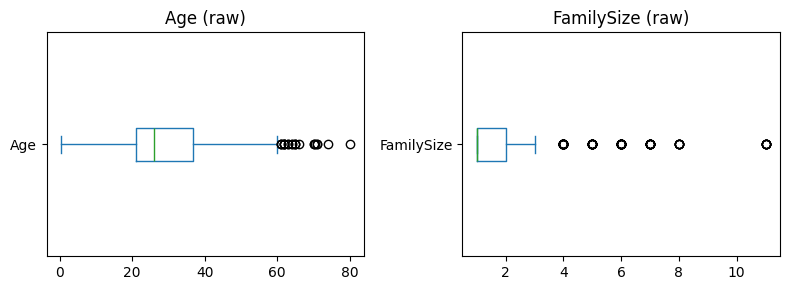

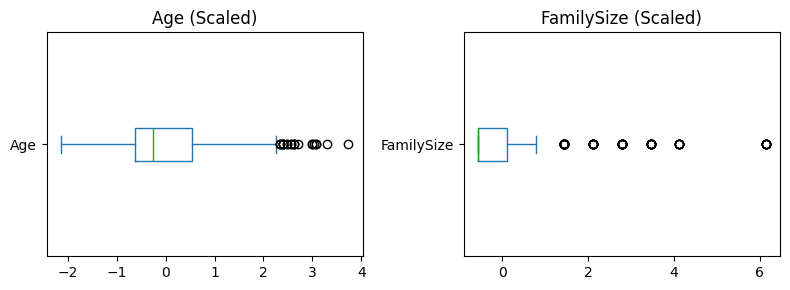

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
df_linear['Age'].plot(kind='box', vert=False, ax=axes[0]); axes[0].set_title('Age (raw)')
df_linear['FamilySize'].plot(kind='box', vert=False, ax=axes[1]); axes[1].set_title('FamilySize (raw)')
plt.tight_layout(); plt.show()

cols = [c for c in ['Age','FamilySize'] if c in X_l.columns]
Xl_scaled_plot = X_l.copy()
sc = StandardScaler().fit(Xl_tr[cols].astype(float))
Xl_scaled_plot[cols] = sc.transform(Xl_scaled_plot[cols].astype(float))

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
Xl_scaled_plot['Age'].plot(kind='box', vert=False, ax=axes[0]); axes[0].set_title('Age (Scaled)')
Xl_scaled_plot['FamilySize'].plot(kind='box', vert=False, ax=axes[1]); axes[1].set_title('FamilySize (Scaled)')
plt.tight_layout(); plt.show()

In [ ]:
Xtr, Xte, ytr, yte = Xl_tr, Xl_te, yl_tr, yl_te

cont_cols = [c for c in ['Age','FamilySize'] if c in X_l.columns]
prep = ColumnTransformer([('scale', StandardScaler(), cont_cols)], remainder='passthrough')

lin   = Pipeline([('prep', prep), ('mdl', LinearRegression())])
ridge = lambda a: Pipeline([('prep', prep), ('mdl', Ridge(alpha=a))])
lasso = lambda a: Pipeline([('prep', prep), ('mdl', Lasso(alpha=a, max_iter=10000))])

### Linear, Ridge, Lasso — Fitting and Evaluating:

In [ ]:
def fit_eval(pipe, name):
    pipe.fit(Xtr, ytr)
    p = np.clip(pipe.predict(Xte), 0, 1)
    yhat = (p>=0.5).astype(int)
    acc = accuracy_score(yte, yhat); pre = precision_score(yte, yhat)
    rec = recall_score(yte, yhat); f1 = f1_score(yte, yhat); aucv = roc_auc_score(yte, p)
    print(f'{name} acc={acc:.3f} prec={pre:.3f} rec={rec:.3f} f1={f1:.3f} auc={aucv:.3f}')
    cm = confusion_matrix(yte, yhat)
    fig, ax = plt.subplots(); im = ax.imshow(cm, cmap='Blues')
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center')
    ax.set_xticks([0,1]); ax.set_xticklabels(['Died (0)', 'Survived (1)'])
    ax.set_yticks([0,1]); ax.set_yticklabels(['Died (0)', 'Survived (1)'])
    ax.set_xlabel('Predicted'); ax.set_ylabel('True'); ax.set_title(f'{name} • Confusion Matrix')
    plt.colorbar(im, ax=ax); plt.tight_layout(); plt.show()
    fpr, tpr, _ = roc_curve(yte, p); r = auc(fpr, tpr)
    return p, (fpr, tpr, r)

### Fitting the linear regression:

Linear acc=0.821 prec=0.796 rec=0.718 f1=0.755 auc=0.882


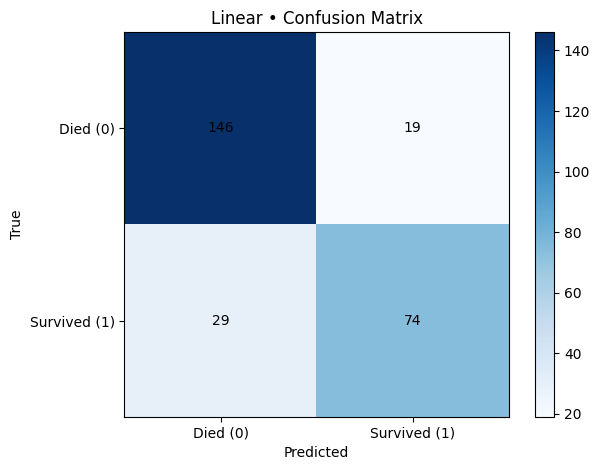

In [ ]:
lin = Pipeline([('prep', prep), ('mdl', LinearRegression())])
p_lin, roc_lin = fit_eval(lin, 'Linear')
# --- storing my results ---
preds['Linear_proba'] = pd.Series(p_lin, index=Xl_te.index).reindex(preds.index)
preds['Linear_pred']  = (preds['Linear_proba']>=0.5).astype(int)
rows.append({'Model':'Linear',
             'Accuracy':accuracy_score(yte, preds['Linear_pred'].loc[Xl_te.index]),
             'Precision':precision_score(yte, preds['Linear_pred'].loc[Xl_te.index]),
             'Recall':recall_score(yte, preds['Linear_pred'].loc[Xl_te.index]),
             'F1':f1_score(yte, preds['Linear_pred'].loc[Xl_te.index]),
             'AUC':roc_auc_score(yte, p_lin)})
model_order.append('Linear')
# --------------------------

### Fitting our Ridge and Lasso Regressions:

Finding first the best Ridge and Lasso ⍺ values

In [ ]:
def f1_at_05(y_true, y_pred):
    return f1_score(y_true, (np.clip(y_pred,0,1)>=0.5).astype(int))

scorer = make_scorer(f1_at_05, greater_is_better=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = {'mdl__alpha': np.logspace(-4, 2, 200)}

gs_r = GridSearchCV(Pipeline([('prep', prep), ('mdl', Ridge())]), grid, scoring=scorer, cv=cv, n_jobs=-1).fit(Xl_tr, yl_tr)
gs_l = GridSearchCV(Pipeline([('prep', prep), ('mdl', Lasso(max_iter=10000))]), grid, scoring=scorer, cv=cv, n_jobs=-1).fit(Xl_tr, yl_tr)

In [ ]:
# --- pick best alphas from the grids
ridge_best = float(gs_r.best_params_['mdl__alpha'])
lasso_best = float(gs_l.best_params_['mdl__alpha'])
print(f'Best α (Ridge): {ridge_best:.6g} | Best α (Lasso): {lasso_best:.6g}')

Best α (Ridge): 7.14943 | Best α (Lasso): 0.00160705


Ridge α=7.14943 acc=0.832 prec=0.802 rec=0.748 f1=0.774 auc=0.880


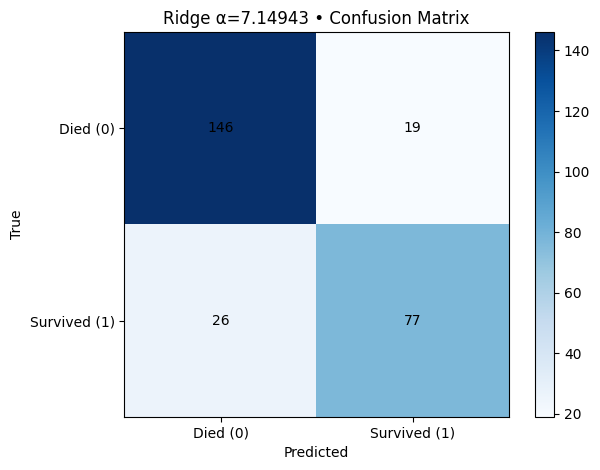

Lasso α=0.00160705 acc=0.825 prec=0.786 rec=0.748 f1=0.766 auc=0.882


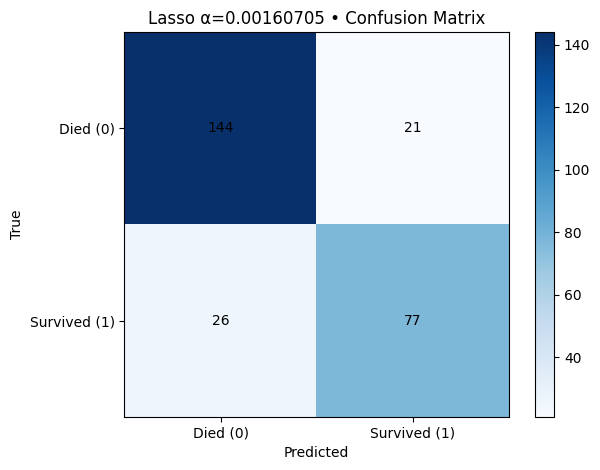

In [ ]:
rocs = [('Linear', roc_lin)]

name = f'Ridge α={ridge_best:.6g}'
p_r, roc_r = fit_eval(Pipeline([('prep', prep), ('mdl', Ridge(alpha=ridge_best))]), name)
preds[name+'_proba'] = pd.Series(p_r, index=Xl_te.index).reindex(preds.index)
preds[name+'_pred']  = (preds[name+'_proba']>=0.5).astype(int)
rows.append({'Model':name,
             'Accuracy':accuracy_score(yte, preds[name+'_pred'].loc[Xl_te.index]),
             'Precision':precision_score(yte, preds[name+'_pred'].loc[Xl_te.index]),
             'Recall':recall_score(yte, preds[name+'_pred'].loc[Xl_te.index]),
             'F1':f1_score(yte, preds[name+'_pred'].loc[Xl_te.index]),
             'AUC':roc_auc_score(yte, p_r)})
model_order.append(name)
rocs.append((name, roc_r))

name = f'Lasso α={lasso_best:.6g}'
p_l, roc_l = fit_eval(Pipeline([('prep', prep), ('mdl', Lasso(alpha=lasso_best, max_iter=10000))]), name)
preds[name+'_proba'] = pd.Series(p_l, index=Xl_te.index).reindex(preds.index)
preds[name+'_pred']  = (preds[name+'_proba']>=0.5).astype(int)
rows.append({'Model':name,
             'Accuracy':accuracy_score(yte, preds[name+'_pred'].loc[Xl_te.index]),
             'Precision':precision_score(yte, preds[name+'_pred'].loc[Xl_te.index]),
             'Recall':recall_score(yte, preds[name+'_pred'].loc[Xl_te.index]),
             'F1':f1_score(yte, preds[name+'_pred'].loc[Xl_te.index]),
             'AUC':roc_auc_score(yte, p_l)})
model_order.append(name)
rocs.append((name, roc_l))


### (Bonus) -- Lasso, which coefficients shrink to zero:

In [ ]:
lasso_pipe = Pipeline([('prep', prep), ('mdl', Lasso(alpha=lasso_best, max_iter=10000))]).fit(Xl_tr, yl_tr)

feat = lasso_pipe.named_steps['prep'].get_feature_names_out(X_l.columns)
coef = lasso_pipe.named_steps['mdl'].coef_
coefs = pd.DataFrame({'feature':feat, 'coef':coef})
coefs['abs'] = coefs['coef'].abs()

zeroed = coefs.loc[coefs['abs'] < 1e-8, 'feature'].tolist()
print('Zeroed by LASSO:', zeroed)
display(coefs.sort_values('abs', ascending=False).drop(columns='abs').head(15))

Zeroed by LASSO: ['remainder__Mother', 'remainder__Title_Royalty', 'remainder__SC_F2', 'remainder__SC_M1']


,feature,coef
10,remainder__Title_Mr,-0.395952
15,remainder__SC_F3,-0.377316
18,remainder__SC_M3,-0.282433
17,remainder__SC_M2,-0.257344
11,remainder__Title_Mrs,0.170435
12,remainder__Title_Officer,-0.160892
9,remainder__Title_Miss,0.108245
1,scale__FamilySize,-0.078243
0,scale__Age,-0.066823
8,remainder__Emb_Q,0.063855


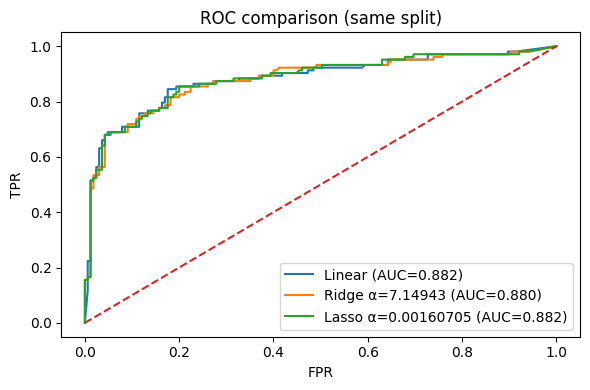

In [ ]:
plt.figure(figsize=(6,4))
for name,(fpr,tpr,r) in rocs:
    plt.plot(fpr,tpr,label=f'{name} (AUC={r:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC comparison (same split)')
plt.legend(); plt.tight_layout(); plt.show()


### Sanity Checks for train-test split:

In [ ]:
print('Same train size across views:',len(Xb_tr)==len(Xg_tr)==len(Xl_tr))
print('Same test size:', len(Xb_te)==len(Xg_te)==len(Xl_te))
print('*'*150)
print('Train index head (Bern/Gaus/Lin):',
      X_b.index[itr][:3].tolist(),
      X_g.index[itr][:3].tolist(),
      X_l.index[itr][:3].tolist())

Same train size across views: True
Same test size: True
******************************************************************************************************************************************************
Train index head (Bern/Gaus/Lin): [748, 45, 28] [748, 45, 28] [748, 45, 28]


### Building our consolidated performance metrics dataframe:

In [ ]:
perf = pd.DataFrame(rows).set_index('Model')
perf = perf.loc[model_order].round(3)

display(perf)

,Accuracy,Precision,Recall,F1,AUC
Model,,,,,
BernoulliNB α=0.1,0.780,0.693,0.767,0.728,0.833
BernoulliNB α=0.5,0.780,0.693,0.767,0.728,0.832
GaussianNB,0.799,0.729,0.757,0.743,0.866
Linear,0.821,0.796,0.718,0.755,0.882
Ridge α=7.14943,0.832,0.802,0.748,0.774,0.880
Lasso α=0.00160705,0.825,0.786,0.748,0.766,0.882


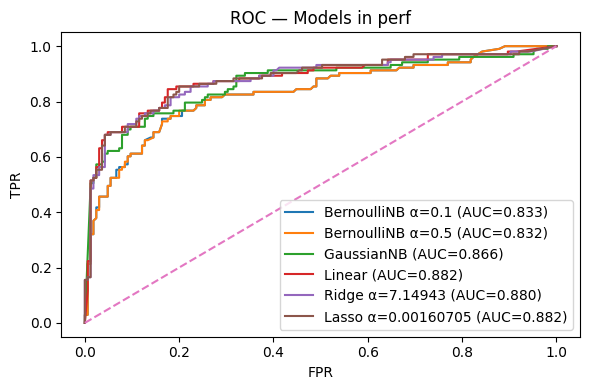

In [ ]:
plt.figure(figsize=(6,4))
for name in perf.index:
    col = name + '_proba'
    if col not in preds.columns:
        continue
    if 'BernoulliNB' in name:
        y_true, idx = yb_te, Xb_te.index
    elif 'GaussianNB' in name:
        y_true, idx = yg_te, Xg_te.index
    else:
        y_true, idx = yte, Xl_te.index
    p = preds[col].loc[idx].values
    fpr, tpr, _ = roc_curve(y_true, p)
    r = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC={r:.3f})')

plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC — Models in perf')
plt.legend(); plt.tight_layout(); plt.show()

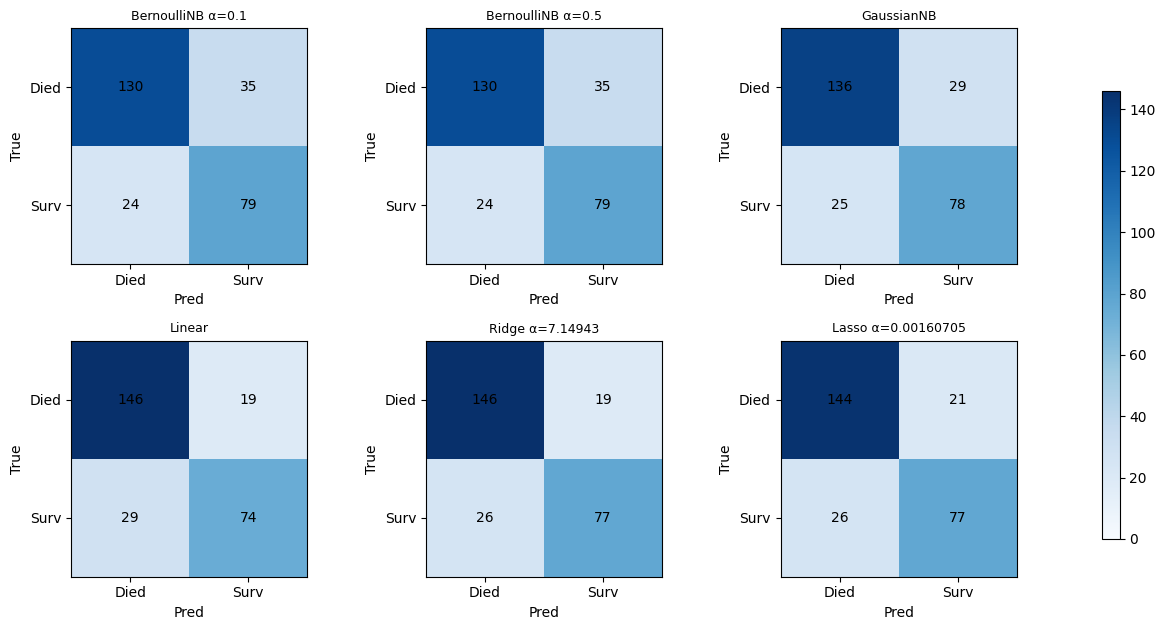

In [ ]:

def y_and_idx(name):
    if 'BernoulliNB' in name: return yb_te, Xb_te.index
    if 'GaussianNB' in name:  return yg_te, Xg_te.index
    return yte, Xl_te.index

names = list(perf.index)
n = len(names); cols = 3; rows = int(np.ceil(n/cols))
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.2*rows))
axes = np.atleast_2d(axes)

cms, vmax = [], 0
for name in names:
    y_true, idx = y_and_idx(name)
    y_pred = preds[name+'_pred'].loc[idx].values
    cm = confusion_matrix(y_true, y_pred)
    cms.append(cm); vmax = max(vmax, cm.max())

for ax, name, cm in zip(axes.ravel(), names, cms):
    im = ax.imshow(cm, cmap='Blues', vmin=0, vmax=vmax)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center')
    ax.set_xticks([0,1]); ax.set_xticklabels(['Died','Surv'])
    ax.set_yticks([0,1]); ax.set_yticklabels(['Died','Surv'])
    ax.set_xlabel('Pred'); ax.set_ylabel('True'); ax.set_title(name, fontsize=9)

for ax in axes.ravel()[n:]: ax.axis('off')

fig.tight_layout(rect=[0, 0, 0.92, 1])
cax = fig.add_axes([0.94, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cax)
plt.show()

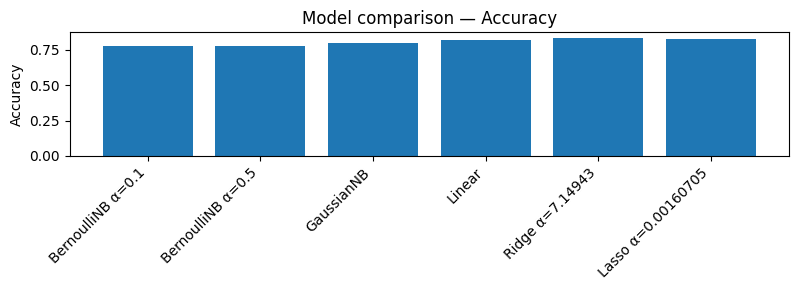

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(perf.index, perf['Accuracy'].values)
plt.xticks(rotation=45, ha='right'); plt.ylabel('Accuracy'); plt.title('Model comparison — Accuracy')
plt.tight_layout(); plt.show()


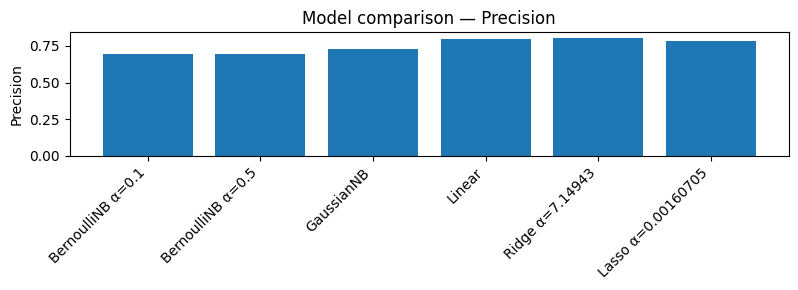

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(perf.index, perf['Precision'].values)
plt.xticks(rotation=45, ha='right'); plt.ylabel('Precision'); plt.title('Model comparison — Precision')
plt.tight_layout(); plt.show()

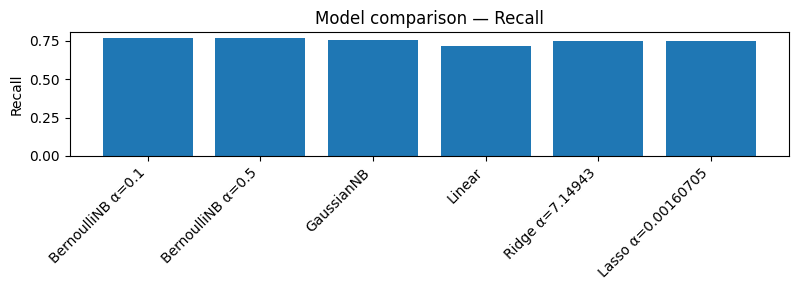

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(perf.index, perf['Recall'].values)
plt.xticks(rotation=45, ha='right'); plt.ylabel('Recall'); plt.title('Model comparison — Recall')
plt.tight_layout(); plt.show()


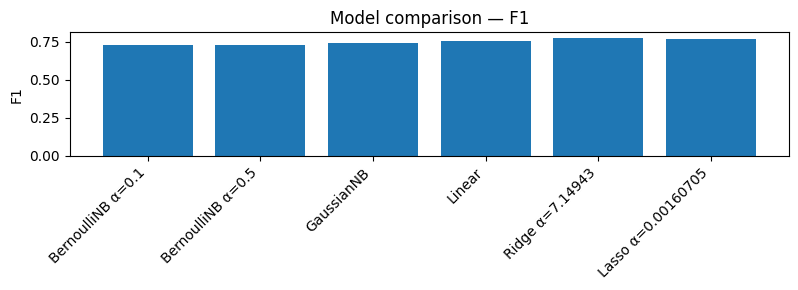

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(perf.index, perf['F1'].values)
plt.xticks(rotation=45, ha='right'); plt.ylabel('F1'); plt.title('Model comparison — F1')
plt.tight_layout(); plt.show()

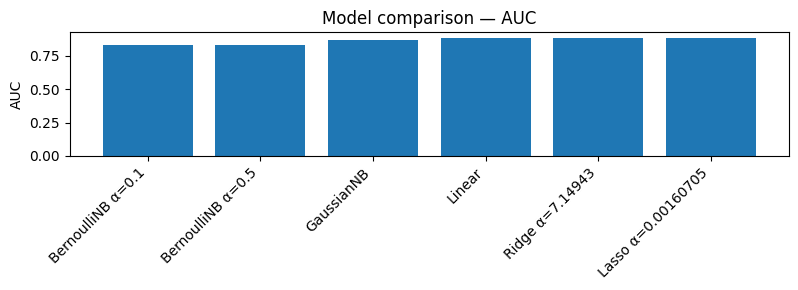

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(perf.index, perf['AUC'].values)
plt.xticks(rotation=45, ha='right'); plt.ylabel('AUC'); plt.title('Model comparison — AUC')
plt.tight_layout(); plt.show()

In [ ]:
!pip -q install nbconvert pyppeteer
!pip -q install "nbconvert[webpdf]" playwright
!python -m playwright install chromium

!jupyter nbconvert --to webpdf --allow-chromium-download "/content/Luca_Barattini_LB3656_AML_Assignment_1 (2).ipynb" --WebPDFExporter.scale=0.20

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
playwright 1.55.0 requires pyee<14,>=13, but you have pyee 11.1.1 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer 2.0.0 requires pyee<12.0.0,>=11.0.0, but you have pyee 13.0.0 which is incompatible.
[NbConvertApp] WARNING | Config option `scale` not recognized by `WebPDFExporter`.
[NbConvertApp] Converting notebook /content/Luca_Barattini_LB3656_AML_Assignment_1 (2).ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 38 image(s).
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1086586 bytes to /content/Luca_Barattini_LB3656_AML_Assignment_1 (2).pdf
